[161.86103896103896] [142.58831168831168] [169.06233766233765]
[161.0] [139.0] [163.0]
           attack     stamina     defense
count  770.000000  770.000000  770.000000
mean   161.861039  169.062338  142.588312
std     55.817370   44.214794   50.171027
min     17.000000    1.000000   32.000000
25%    118.000000  137.000000  102.250000
50%    161.000000  163.000000  139.000000
75%    204.000000  190.000000  176.000000
max    345.000000  496.000000  396.000000


[False    716
 True      54
 Name: powerful_pokemon, dtype: int64]

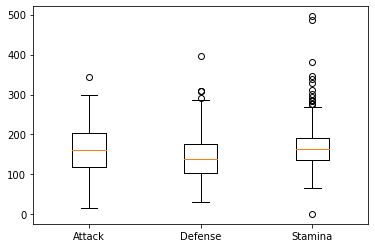

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the file and look at a snippet of it
pg = pd.read_csv("pokemon.csv", na_values = "NaN")

# Change values that are numbers to numerical
pg["capture_rate"] = pg["capture_rate"].str.rstrip("%").astype(float)
pg["height"] = pg["height"].str.rstrip("m").astype(float)

# Question: How many of these pokemon are considered powerful

# Find the mean in order to look at a central value
attack_mean = [pg["attack"].mean()]
defense_mean = [pg["defense"].mean()]
stamina_mean = [pg["stamina"].mean()]

print(attack_mean, defense_mean, stamina_mean)

# Find the median to determine what the value in the boxplot will be
attack_median = [pg["attack"].median()]
defense_median = [pg["defense"].median()]
stamina_median = [pg["stamina"].median()]

print(attack_median, defense_median, stamina_median)

# Initializing the plot
fig, ax = plt.subplots()

# Creating a chunk of data for the boxplots
data =(pg["attack"], pg["defense"], pg["stamina"])

# Creation of the boxplots
ax.boxplot(data, labels = ["Attack", "Defense", "Stamina"])

# Adding a column to the end of the data that uses boolean logic to determine idf a pokemon is powerful
pg["powerful_pokemon"] = (pg["attack"] >= 204) & (pg["defense"] >= 176) & (pg["stamina"] >= 190)

# Compute summary statisticcs to determine what the 75% value is
print(pg[['attack', 'stamina', 'defense']].describe())

# Count the number of powerful pokemon in our dataset
[(pg["powerful_pokemon"].value_counts())]

#54 powerful pokemon


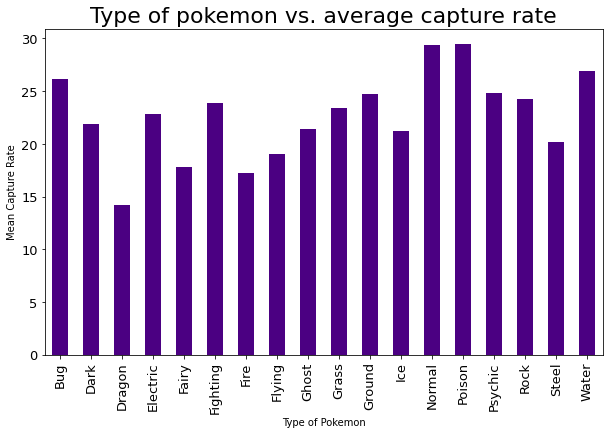

In [149]:
# Question: Which pokemon are the easiest vs. the hardest to capture?

# Grouped the data into the mean of each type of pokemon
df = pg.groupby(['main_type'])['capture_rate'].mean()

# Created the bar graph of the data
ax = df.plot(kind='bar', figsize=(10,6), color="indigo");
ax.set_alpha(0.8)

# Setting the titles so the table is readable
ax.set_title("Type of pokemon vs. average capture rate")
ax.set_ylabel("Mean Capture Rate");
ax.set_xlabel("Type of Pokemon")

# Showing the bar graph
plt.show()

# Dragon are hardest to capture, poison and normal are easiest

Text(0.5, 1.0, 'Height vs Type of Pokemon')

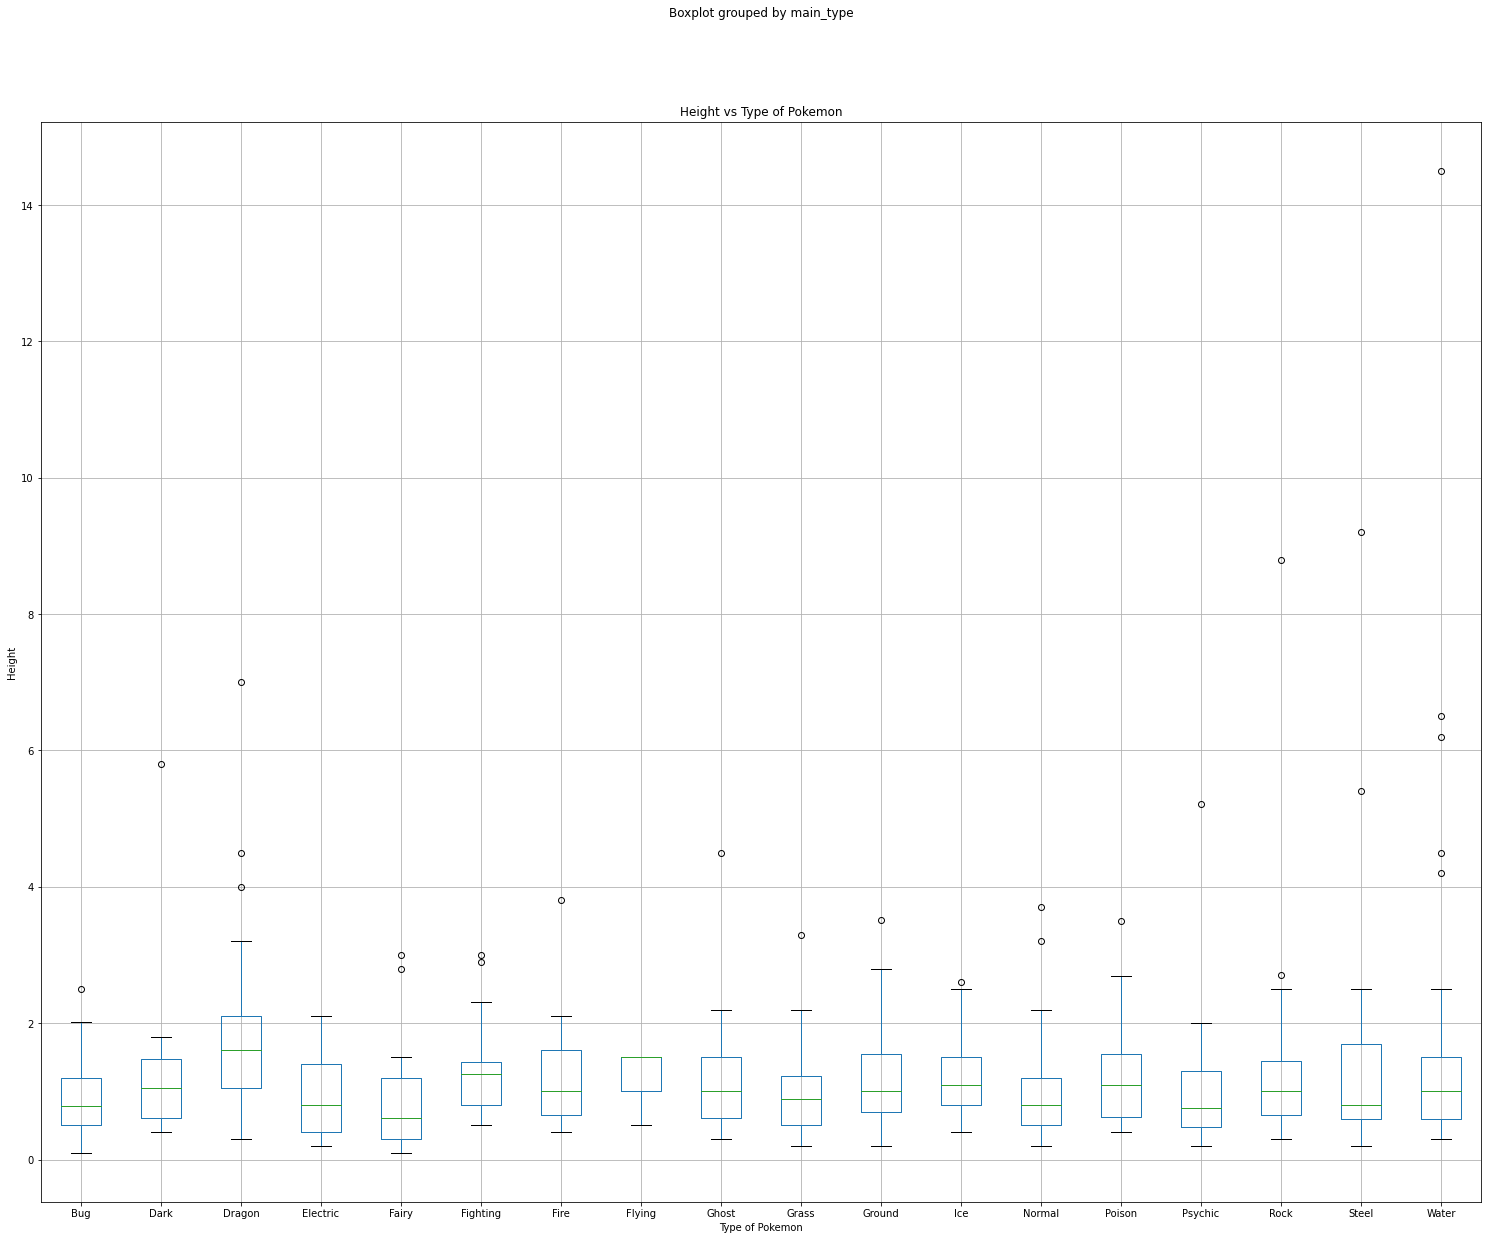

In [158]:
# Question: Which type of pokemon is likely to be the tallest vs the shortest?

# Create large figure size so the variables are readable
ax2 = pg.boxplot(column="height",by="main_type", figsize = (25, 20))

# Add labels to make descriptibe
ax2.set_ylabel("Height")
ax2.set_xlabel("Type of Pokemon")
ax2.set_title("Height vs Type of Pokemon")

# Dragon type seems to have the highest median value for height
# Fairy seems to be the shortest, both make sense

['number',
 'pokemon_name',
 'pic_url',
 'main_type',
 'secondary_type',
 'region',
 'category',
 'height',
 'weight',
 'pokemon_family',
 'attack',
 'defense',
 'stamina',
 'cp_range',
 'hp_range',
 'capture_rate',
 'flee_rate',
 'male_perc',
 'female_perc',
 'resistance',
 'weakness',
 'wild_avail',
 'egg_avail',
 'raid_avail',
 'research_avail',
 'shiny',
 'shadow',
 'pkedex_desc',
 'poss_attacks',
 'powerful_pokemon']

numpy.float64